**In this assignment, you continue to study the data of the US Education System. Again, please down it from here (dataset). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.**

**1 - See TOTAL_REVENUE, which includes total revenue data, and TOTAL_EXPENDITURE, which includes total spending data. Do these variables contain outliers?**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

education = pd.read_csv("data/education.csv")
education = education.set_index("Unnamed: 0")
display(education)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,winsorizing_total_revenue,winsorizing_TOTAL_EXPENDITURE,budget_defilict,winsorized_budget_defilict,budget_defilict2,wins_budget_def2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,1992_ALABAMA,ALABAMA,1992,802054.333333,2.678885e+06,3.041770e+05,1.659028e+06,7.156800e+05,2.653798e+06,1.481703e+06,...,208.000000,252.000000,207.000000,260.0,2.678885e+06,2.653798e+06,25087.000000,25087.000000,25087.000000,25087.000000
1,1992_ALASKA,ALASKA,1992,802054.333333,1.049591e+06,1.067800e+05,7.207110e+05,2.221000e+05,9.724880e+05,4.983620e+05,...,218.418605,266.325581,215.372093,260.0,1.206819e+06,1.237103e+06,77103.000000,77103.000000,-30284.000000,-30284.000000
2,1992_ARIZONA,ARIZONA,1992,802054.333333,3.258079e+06,2.978880e+05,1.369815e+06,1.590376e+06,3.401580e+06,1.435908e+06,...,215.000000,265.000000,209.000000,260.0,3.258079e+06,3.401580e+06,-143501.000000,-143501.000000,-143501.000000,-143501.000000
3,1992_ARKANSAS,ARKANSAS,1992,802054.333333,1.711959e+06,1.785710e+05,9.587850e+05,5.746030e+05,1.743022e+06,9.643230e+05,...,210.000000,256.000000,211.000000,260.0,1.711959e+06,1.743022e+06,-31063.000000,-31063.000000,-31063.000000,-31063.000000
4,1992_CALIFORNIA,CALIFORNIA,1992,802054.333333,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,...,208.000000,261.000000,202.000000,260.0,2.437866e+07,2.535205e+07,-878807.000000,-526142.000000,-973387.000000,-556255.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,2011_NATIONAL,NATIONAL,2011,946587.745098,1.195207e+07,1.445229e+06,5.220582e+06,5.286261e+06,1.191374e+07,6.233568e+06,...,241.000000,284.000000,221.000000,265.0,1.195207e+07,1.191374e+07,38327.921569,38327.921569,38327.921569,38327.921569
1656,2013_DODEA,DODEA,2013,947012.176471,1.192289e+07,1.066444e+06,5.368678e+06,5.487767e+06,1.192948e+07,6.317421e+06,...,245.000000,290.000000,232.000000,277.0,1.192289e+07,1.192948e+07,-6595.980392,-6595.980392,-6595.980392,-6595.980392
1657,2013_NATIONAL,NATIONAL,2013,947012.176471,1.192289e+07,1.066444e+06,5.368678e+06,5.487767e+06,1.192948e+07,6.317421e+06,...,242.000000,285.000000,222.000000,268.0,1.192289e+07,1.192948e+07,-6595.980392,-6595.980392,-6595.980392,-6595.980392


In [2]:
education.TOTAL_REVENUE.describe()

count    1.301000e+03
mean     9.097897e+06
std      1.164809e+07
min      4.656500e+05
25%      2.212352e+06
50%      5.194536e+06
75%      1.099108e+07
max      8.921726e+07
Name: TOTAL_REVENUE, dtype: float64

In [3]:
education.TOTAL_EXPENDITURE.describe()

count    1.301000e+03
mean     9.202368e+06
std      1.187874e+07
min      4.816650e+05
25%      2.199604e+06
50%      5.350543e+06
75%      1.082643e+07
max      8.532013e+07
Name: TOTAL_EXPENDITURE, dtype: float64

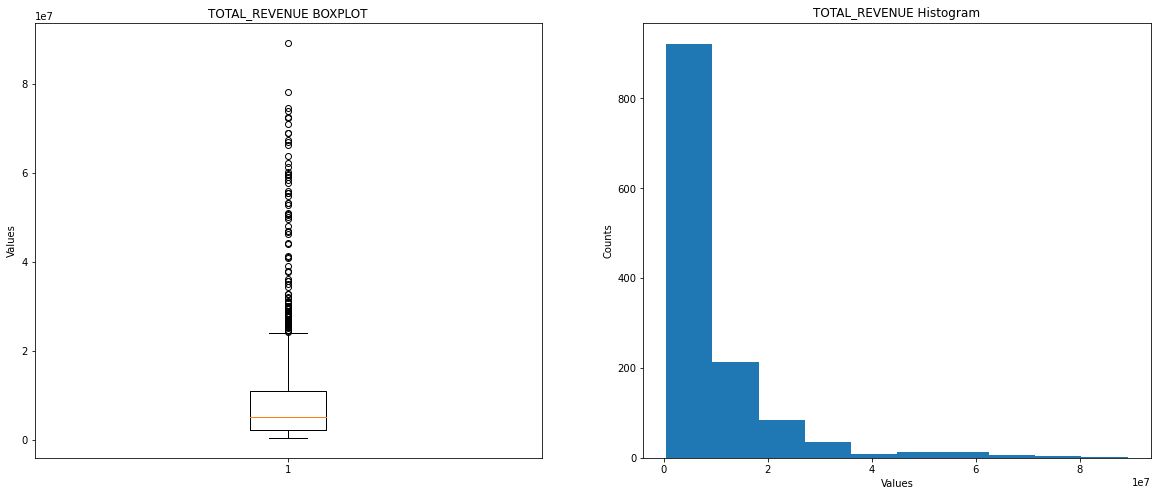

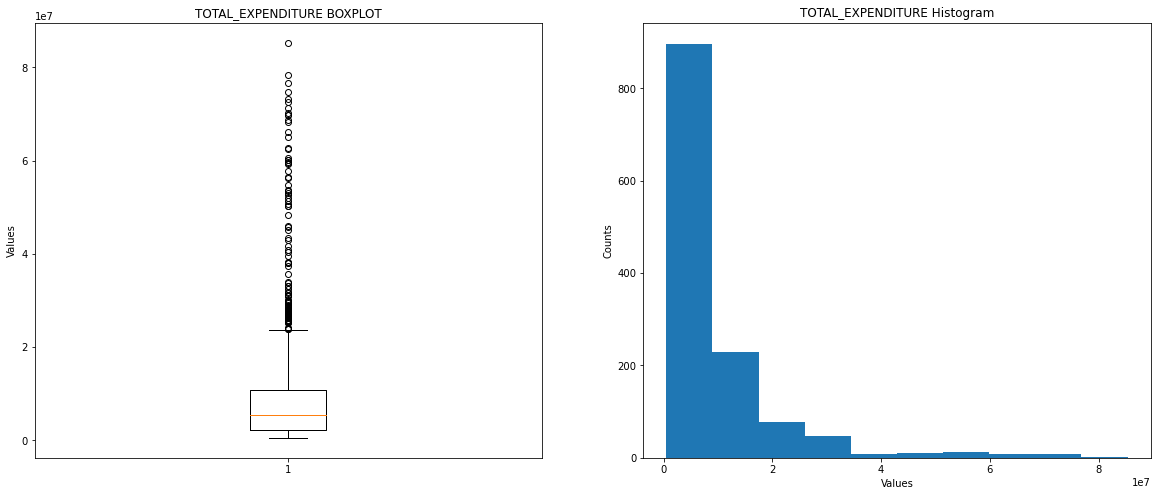

In [4]:
plt.figure(figsize=(20,8))

plt.subplot(121)
plt.boxplot(education.TOTAL_REVENUE)
plt.ylabel("Values")
plt.title("TOTAL_REVENUE BOXPLOT")

plt.subplot(122)
plt.hist(education.TOTAL_REVENUE)
plt.xlabel("Values")
plt.ylabel("Counts")
plt.title("TOTAL_REVENUE Histogram")



plt.figure(figsize=(20,8))
plt.subplot(121)
plt.boxplot(education.TOTAL_EXPENDITURE)
plt.ylabel("Values")
plt.title("TOTAL_EXPENDITURE BOXPLOT")

plt.subplot(122)
plt.hist(education.TOTAL_EXPENDITURE)
plt.xlabel("Values")
plt.ylabel("Counts")
plt.title("TOTAL_EXPENDITURE Histogram")


plt.show()

**Zscore (Standardization):** 

In [5]:
from scipy.stats import zscore

z1 = zscore(education.TOTAL_REVENUE)
z2 = zscore(education.TOTAL_EXPENDITURE)

for threshold in range(1,5):
    print("Threshold value {}".format(threshold))
    print("-----"*10)
    print("Number of Outliers for Total Revenue: {}".format(len(np.where(z1>threshold)[0])))
    print("Number of Outliers for Total Expenditure: {}".format(len(np.where(z2>threshold)[0])))
    print("-----"*10)

Threshold value 1
--------------------------------------------------
Number of Outliers for Total Revenue: 134
Number of Outliers for Total Expenditure: 134
--------------------------------------------------
Threshold value 2
--------------------------------------------------
Number of Outliers for Total Revenue: 52
Number of Outliers for Total Expenditure: 54
--------------------------------------------------
Threshold value 3
--------------------------------------------------
Number of Outliers for Total Revenue: 38
Number of Outliers for Total Expenditure: 39
--------------------------------------------------
Threshold value 4
--------------------------------------------------
Number of Outliers for Total Revenue: 22
Number of Outliers for Total Expenditure: 23
--------------------------------------------------


There are lots of outliers in total income TOTAL_REVENUE and total expenditure TOTAL_EXPENDITURE variables.

**2- If you find outliers in the total income TOTAL_REVENUE and total expenditure TOTAL_EXPENDITURE variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.**

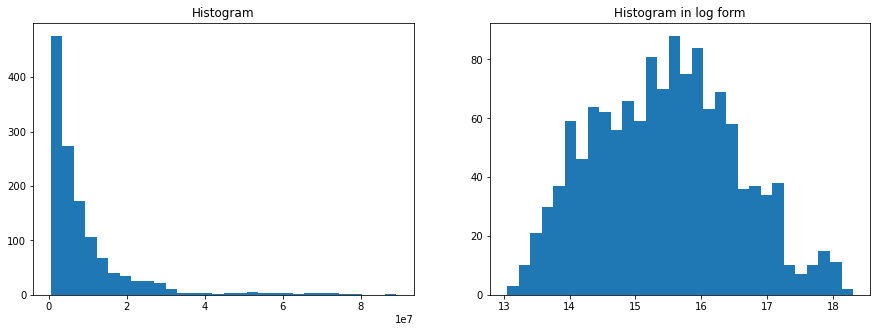

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Histogram")
plt.hist(education.TOTAL_REVENUE,bins=30)

plt.subplot(122)
plt.title("Histogram in log form")
plt.hist(np.log(education.TOTAL_REVENUE),bins=30)
plt.show()

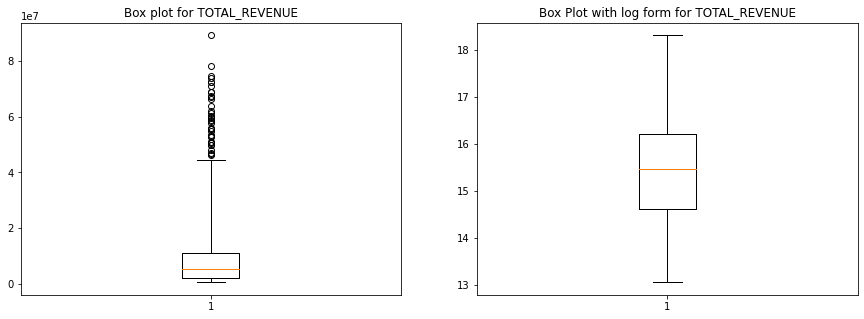

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Box plot for TOTAL_REVENUE")
plt.boxplot(education.TOTAL_REVENUE,whis = 4)

plt.subplot(122)
plt.title("Box Plot with log form for TOTAL_REVENUE")
plt.boxplot(np.log(education.TOTAL_REVENUE))
plt.show()

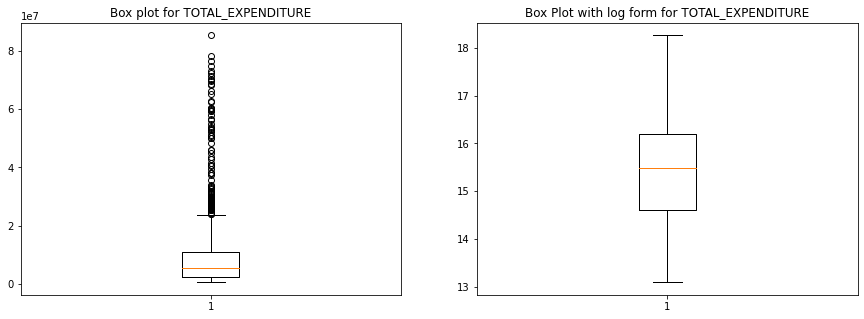

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Box plot for TOTAL_EXPENDITURE")
plt.boxplot(education.TOTAL_EXPENDITURE)

plt.subplot(122)
plt.title("Box Plot with log form for TOTAL_EXPENDITURE")
plt.boxplot(np.log(education.TOTAL_EXPENDITURE))
plt.show()

In [9]:
q75_log, q25_log = np.percentile(np.log(education.TOTAL_REVENUE),[75,25])
q75, q25 = np.percentile(education.TOTAL_REVENUE,[75,25])

IQR_log = q75_log -q25_log
IQR = q75-q25

log_threshold_values = []

for threshold_value in np.arange(1,5,0.5):
    min_value_log = q25_log - (IQR_log*threshold_value)
    max_value_log = q75_log + (IQR_log*threshold_value)
    
    min_value = q25 - (IQR*threshold_value)
    max_value = q75 + (IQR*threshold_value)
    
    outlier_value_number_log = len(np.where((np.log(education.TOTAL_REVENUE)>max_value_log) | (np.log(education.TOTAL_REVENUE)<min_value_log))[0])
    outlier_value_number = len(np.where((np.log(education.TOTAL_REVENUE)>max_value) | (np.log(education.TOTAL_REVENUE)<min_value))[0])

log_threshold_values.append({"threshold_value":threshold_value,
                            "outlier_value_number":outlier_value_number,
                            "outlier_value_number_log":outlier_value_number_log})

pd.DataFrame(log_threshold_values)

,threshold_value,outlier_value_number,outlier_value_number_log
0,4.5,0,0


In [10]:
q75_log, q25_log = np.percentile(np.log(education.TOTAL_EXPENDITURE),[75,25])
q75, q25 = np.percentile(education.TOTAL_EXPENDITURE,[75,25])

IQR_log = q75_log -q25_log
IQR = q75-q25

log_threshold_values = []

for threshold_value in np.arange(1,5,0.5):
    min_value_log = q25_log - (IQR_log*threshold_value)
    max_value_log = q75_log + (IQR_log*threshold_value)
    
    min_value = q25 - (IQR*threshold_value)
    max_value = q75 + (IQR*threshold_value)
    
    outlier_value_number_log = len(np.where((np.log(education.TOTAL_EXPENDITURE)>max_value_log) | (np.log(education.TOTAL_EXPENDITURE)<min_value_log))[0])
    outlier_value_number = len(np.where((np.log(education.TOTAL_EXPENDITURE)>max_value) | (np.log(education.TOTAL_EXPENDITURE)<min_value))[0])

log_threshold_values.append({"threshold_value":threshold_value,
                            "outlier_value_number":outlier_value_number,
                            "outlier_value_number_log":outlier_value_number_log})

pd.DataFrame(log_threshold_values)

,threshold_value,outlier_value_number,outlier_value_number_log
0,4.5,0,0


In [11]:
education.TOTAL_REVENUE.describe()

count    1.301000e+03
mean     9.097897e+06
std      1.164809e+07
min      4.656500e+05
25%      2.212352e+06
50%      5.194536e+06
75%      1.099108e+07
max      8.921726e+07
Name: TOTAL_REVENUE, dtype: float64

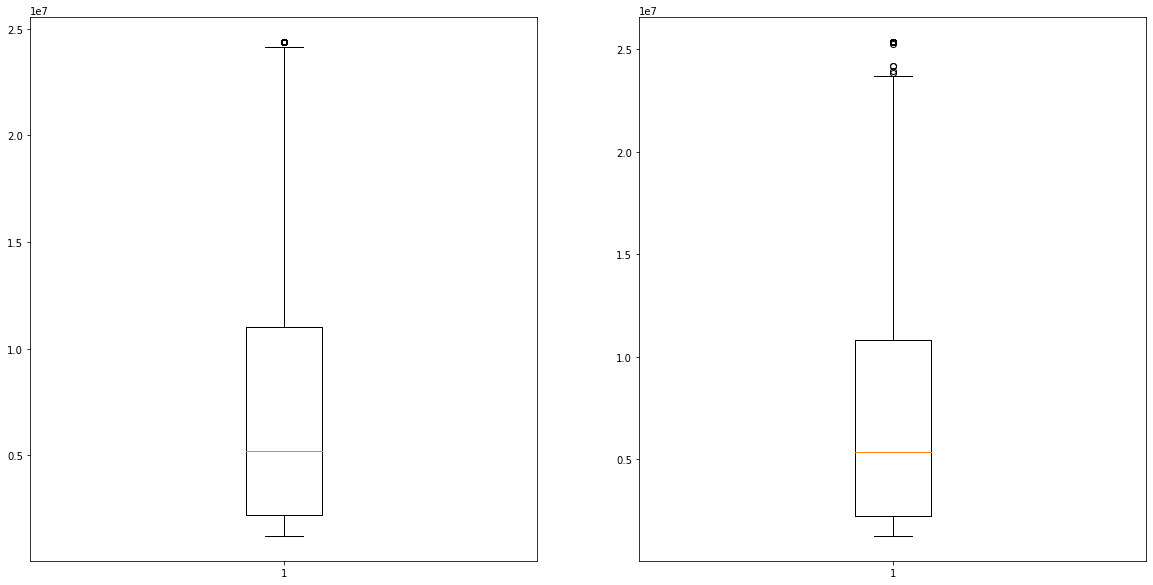

In [12]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(20,10))
plt.subplot(121)
winsorizing = winsorize(np.array(education.TOTAL_REVENUE),(0.1,0.08))
plt.boxplot(winsorizing)
plt.subplot(122)
winsorizing_expen = winsorize(np.array(education.TOTAL_EXPENDITURE),(0.1,0.08))
plt.boxplot(winsorizing_expen)


education["winsorizing_total_revenue"] = winsorizing
education["winsorizing_TOTAL_EXPENDITURE"] = winsorizing_expen

**3- Subtract the total expenditure TOTAL_EXPENDITURE from the total income variable TOTAL_REVENUE to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.**

In [13]:
lst = []
for x in range(education.shape[0]):
    lst.append((education["TOTAL_REVENUE"].iloc[x]-education["TOTAL_EXPENDITURE"].iloc[x]))

education["budget_defilict"] = lst

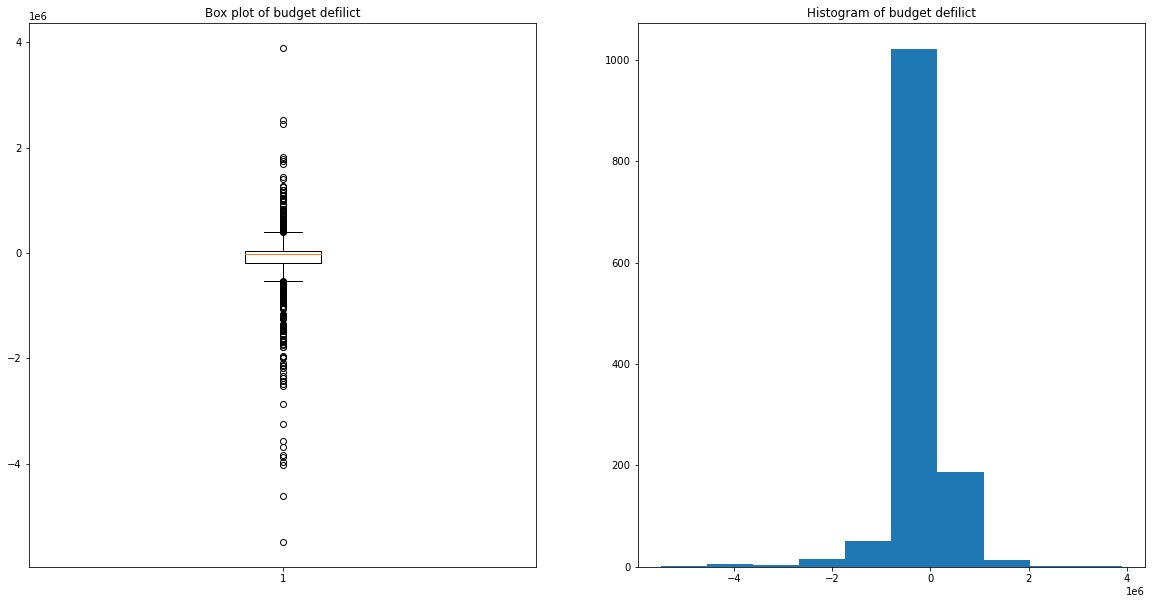

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title("Box plot of budget defilict")
plt.boxplot(education.budget_defilict)
plt.subplot(122)
plt.title("Histogram of budget defilict")
plt.hist(education.budget_defilict)
plt.show()

**Zscore (Standardization):**

In [15]:
from scipy.stats import zscore

z1 = zscore(education.budget_defilict)

for threshold in range(1,5):
    print("Threshold value {}".format(threshold))
    print("-----"*10)
    print("Number of Outliers for Budget Defilict: {}".format(len(np.where((z1>threshold) | (z1< -(threshold)))[0])))
    print("-----"*10)

Threshold value 1
--------------------------------------------------
Number of Outliers for Budget Defilict: 153
--------------------------------------------------
Threshold value 2
--------------------------------------------------
Number of Outliers for Budget Defilict: 63
--------------------------------------------------
Threshold value 3
--------------------------------------------------
Number of Outliers for Budget Defilict: 30
--------------------------------------------------
Threshold value 4
--------------------------------------------------
Number of Outliers for Budget Defilict: 16
--------------------------------------------------


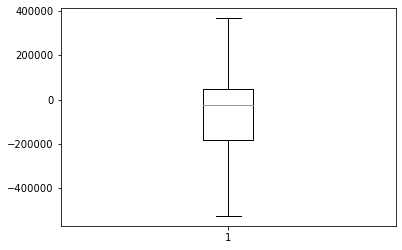

In [16]:
winsorized_budget_defilict = winsorize(np.array(education.budget_defilict),(0.088,0.07))
plt.boxplot(winsorized_budget_defilict)
plt.show()

In [17]:
education["winsorized_budget_defilict"] = winsorized_budget_defilict

**4- Again create a variable that can be considered as a budget deficit by subtracting the total income TOTAL_REVENUE variable from the total expenditure TOTAL_EXPENDITURE. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.**

In [18]:
lst = []
for x in range(education.shape[0]):
    lst.append((education["winsorizing_total_revenue"].iloc[x]-education["winsorizing_TOTAL_EXPENDITURE"].iloc[x]))

education["budget_defilict2"] = lst

In [19]:
pd.set_option('float_format', '{:.2f}'.format)
education.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,1301.00,2003.99,7.21,1992.00,1998.00,2004.00,2010.00,2016.00
ENROLL,1301.00,912856.03,1034714.97,43866.00,281591.00,686360.00,987332.00,6307022.00
TOTAL_REVENUE,1301.00,9097897.34,11648092.94,465650.00,2212352.00,5194536.00,10991081.00,89217262.00
FEDERAL_REVENUE,1301.00,767402.05,1136503.54,31020.00,191840.00,409915.00,840919.00,9990221.00
STATE_REVENUE,1301.00,4221979.01,5496748.17,0.00,1182776.00,2578149.00,5132066.00,50904567.00
LOCAL_REVENUE,1301.00,4108516.28,5437180.75,22093.00,736946.00,2105089.00,4790106.00,36105265.00
TOTAL_EXPENDITURE,1301.00,9202368.18,11878737.43,481665.00,2199604.00,5350543.00,10826431.00,85320133.00
INSTRUCTION_EXPENDITURE,1301.00,4765951.47,6240535.88,265549.00,1189394.00,2720735.00,5619617.00,43964520.00
SUPPORT_SERVICES_EXPENDITURE,1301.00,2681395.33,3325544.27,139963.00,651058.00,1551274.00,3236339.39,26058021.00
OTHER_EXPENDITURE,1301.00,422537.83,520131.25,11541.00,111153.00,264883.00,504388.00,3995951.00


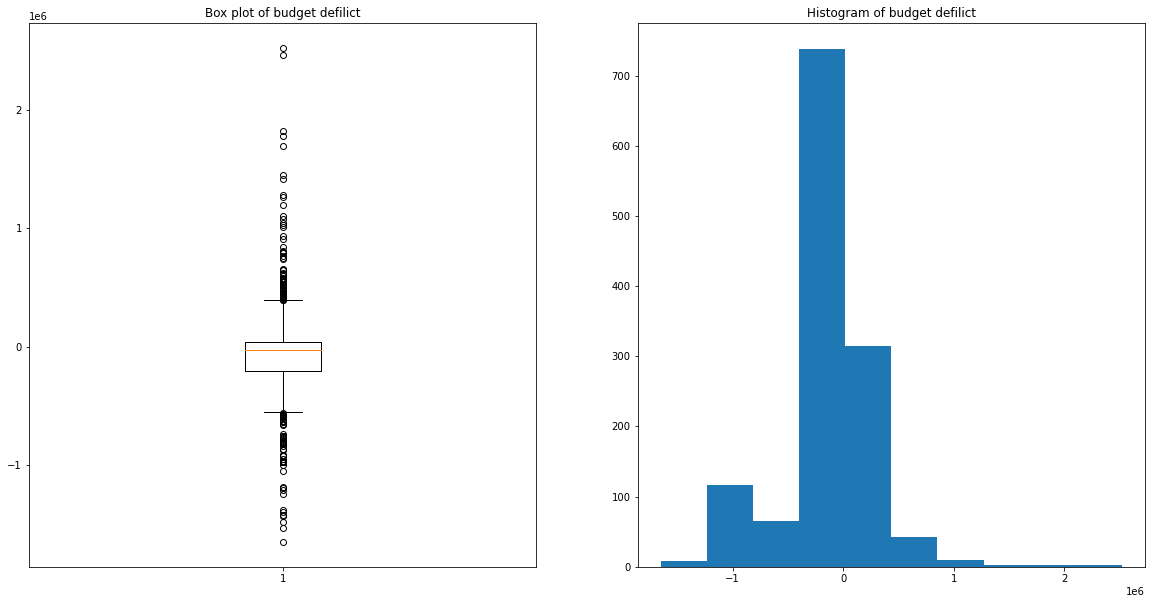

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title("Box plot of budget defilict")
plt.boxplot(education.budget_defilict2)
plt.subplot(122)
plt.title("Histogram of budget defilict")
plt.hist(education.budget_defilict2)
plt.show()

#There are still outliers in the new column

In [21]:
from scipy.stats import zscore

z1 = zscore(education.budget_defilict2)

for threshold in range(1,5):
    print("Threshold value {}".format(threshold))
    print("-----"*10)
    print("Number of Outliers for Budget Defilict: {}".format(len(np.where((z1>threshold) | (z1< -(threshold)))[0])))
    print("-----"*10)

Threshold value 1
--------------------------------------------------
Number of Outliers for Budget Defilict: 262
--------------------------------------------------
Threshold value 2
--------------------------------------------------
Number of Outliers for Budget Defilict: 143
--------------------------------------------------
Threshold value 3
--------------------------------------------------
Number of Outliers for Budget Defilict: 18
--------------------------------------------------
Threshold value 4
--------------------------------------------------
Number of Outliers for Budget Defilict: 5
--------------------------------------------------


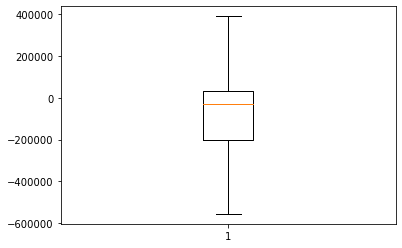

In [22]:
wins_budget_def2 = winsorize(np.array(education.budget_defilict2),(0.119,0.056))
plt.boxplot(wins_budget_def2)
plt.show()

education["wins_budget_def2"] = wins_budget_def2

In [23]:
from scipy.stats import zscore

z1 = zscore(education.wins_budget_def2)

for threshold in range(1,5):
    print("Threshold value {}".format(threshold))
    print("-----"*10)
    print("Number of Outliers for Budget Defilict: {}".format(len(np.where((z1>threshold) | (z1< -(threshold)))[0])))
    print("-----"*10)

Threshold value 1
--------------------------------------------------
Number of Outliers for Budget Defilict: 385
--------------------------------------------------
Threshold value 2
--------------------------------------------------
Number of Outliers for Budget Defilict: 0
--------------------------------------------------
Threshold value 3
--------------------------------------------------
Number of Outliers for Budget Defilict: 0
--------------------------------------------------
Threshold value 4
--------------------------------------------------
Number of Outliers for Budget Defilict: 0
--------------------------------------------------


**5- Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?**

In [24]:
education.wins_budget_def2.describe()


count      1301.00
mean     -84598.19
std      249536.40
min     -556255.00
25%     -203647.00
50%      -30284.00
75%       34158.00
max      390332.00
Name: wins_budget_def2, dtype: float64

In [25]:
education.budget_defilict.describe()

count       1301.00
mean     -104470.84
std       568820.97
min     -5487742.00
25%      -182588.00
50%       -23135.00
75%        49608.00
max      3897129.00
Name: budget_defilict, dtype: float64

I am not seeing any differences between two of them. 

In [26]:
education.to_csv('data/education.csv')

**6- If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?**

I think firslty, we should substract original values. Then we can look what we can do for problems. I think it is safer way to do this substract

In [27]:
education

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,winsorizing_total_revenue,winsorizing_TOTAL_EXPENDITURE,budget_defilict,winsorized_budget_defilict,budget_defilict2,wins_budget_def2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,1992_ALABAMA,ALABAMA,1992,802054.33,2678885.00,304177.00,1659028.00,715680.00,2653798.00,1481703.00,...,208.00,252.00,207.00,260.00,2678885.00,2653798.00,25087.00,25087.00,25087.00,25087.00
1,1992_ALASKA,ALASKA,1992,802054.33,1049591.00,106780.00,720711.00,222100.00,972488.00,498362.00,...,218.42,266.33,215.37,260.00,1206819.00,1237103.00,77103.00,77103.00,-30284.00,-30284.00
2,1992_ARIZONA,ARIZONA,1992,802054.33,3258079.00,297888.00,1369815.00,1590376.00,3401580.00,1435908.00,...,215.00,265.00,209.00,260.00,3258079.00,3401580.00,-143501.00,-143501.00,-143501.00,-143501.00
3,1992_ARKANSAS,ARKANSAS,1992,802054.33,1711959.00,178571.00,958785.00,574603.00,1743022.00,964323.00,...,210.00,256.00,211.00,260.00,1711959.00,1743022.00,-31063.00,-31063.00,-31063.00,-31063.00
4,1992_CALIFORNIA,CALIFORNIA,1992,802054.33,26260025.00,2072470.00,16546514.00,7641041.00,27138832.00,14358922.00,...,208.00,261.00,202.00,260.00,24378660.00,25352047.00,-878807.00,-526142.00,-973387.00,-556255.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,2011_NATIONAL,NATIONAL,2011,946587.75,11952071.75,1445229.41,5220581.71,5286260.63,11913743.82,6233567.98,...,241.00,284.00,221.00,265.00,11952071.75,11913743.82,38327.92,38327.92,38327.92,38327.92
1656,2013_DODEA,DODEA,2013,947012.18,11922888.78,1066443.96,5368677.63,5487767.20,11929484.76,6317421.02,...,245.00,290.00,232.00,277.00,11922888.78,11929484.76,-6595.98,-6595.98,-6595.98,-6595.98
1657,2013_NATIONAL,NATIONAL,2013,947012.18,11922888.78,1066443.96,5368677.63,5487767.20,11929484.76,6317421.02,...,242.00,285.00,222.00,268.00,11922888.78,11929484.76,-6595.98,-6595.98,-6595.98,-6595.98


(array([2.000e+00, 5.000e+00, 3.000e+00, 1.600e+01, 5.000e+01, 1.021e+03,
        1.870e+02, 1.400e+01, 2.000e+00, 1.000e+00]),
 array([-5487742. , -4549254.9, -3610767.8, -2672280.7, -1733793.6,
         -795306.5,   143180.6,  1081667.7,  2020154.8,  2958641.9,
         3897129. ]),
 <a list of 10 Patch objects>)

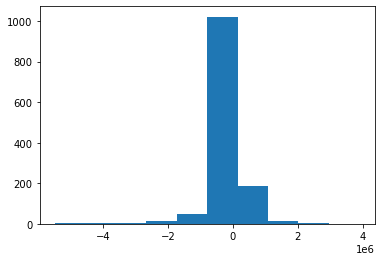

In [28]:
plt.hist(education.budget_defilict)

In [29]:
education.budget_defilict.isnull().sum()
education.reset_index(inplace = True)
education.loc[x].budget_defilict

54290.54901961051

In [33]:
education.budget_defilict.iloc[538]

-320959.0

In [32]:
education.budget_defilict.iloc[537]

-34500.0

In [93]:
for x in range(education.shape[0]):
    if education.loc[x].budget_defilict > 3000000.0 :
        education.drop(education.loc[education.index == x].index,inplace = True)
    elif education.loc[x].budget_defilict < (-3000000.0):
        education.drop(education.loc[education.index == x].index,inplace = True)
plt.hist(education.budget_defilict)

KeyError: 537